In [1]:
import pandas as pd

df = pd.read_csv('data/mobile.csv', index_col=0)
df.head()

,battery_power,clock_speed,four_g,int_memory,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range
0,1142,1.4,0,6,8,8,663,5,1,1,0
1,728,1.7,1,5,2,20,834,5,1,0,0
2,1868,0.5,1,40,8,17,298,17,1,0,0
3,890,2.2,0,44,8,13,751,3,0,0,0
4,1433,1.6,0,4,8,11,258,4,1,1,0


In [2]:
chosen_data = df[['battery_power', 'pc', 'int_memory', 'ram']]
chosen_data.head()

,battery_power,pc,int_memory,ram
0,1142,8,6,663
1,728,20,5,834
2,1868,17,40,298
3,890,13,44,751
4,1433,11,4,258


In [3]:
import numpy as np

X = np.array(chosen_data)
me = np.mean(X, axis=0) # mean
ra = np.ptp(X, axis=0) # range
Y = np.divide(np.subtract(X, me), ra)

me2 = np.mean(X, axis=0)

In [4]:
from sklearn.cluster import KMeans
np.set_printoptions(precision=4)

n_clusters = 5
min_inertia = np.inf
random_states = np.arange(20)

for i in range(20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_states[i])
    kmeans.fit(Y)
    preds = kmeans.labels_
    if kmeans.inertia_ < min_inertia:
        min_inertia = kmeans.inertia_
        best_partition, best_deltas, best_means = [], [], []
        
        for j in range(n_clusters):
            cluster = X[np.where(preds==j)]
            cluster_means = np.mean(cluster, axis=0)
            cur_delta = 100 * (np.divide(np.subtract(cluster_means, me), me))
            best_partition.append(cluster)
            best_means.append(cluster_means)
            best_deltas.append(cur_delta)

for i in range(n_clusters):
    print("delta {}".format(i), best_deltas[i], "#el:", best_partition[i].shape[0])
print("min inertia", min_inertia)
    

delta 0 [19.2013 -4.2259 52.2376 48.4992] #el: 82
delta 1 [-25.8201 -41.1796 -46.782    8.6553] #el: 92
delta 2 [  8.3991 -47.1756  50.5577 -45.0334] #el: 76
delta 3 [ 37.2706  43.0807 -50.063  -14.6005] #el: 71
delta 4 [-31.4381  59.0084  -3.3854  -3.9753] #el: 79
min inertia 69.52784105786077


## 1 Take a feature, find the 95% confidence interval for its grand mean by using bootstrap

feature : battery_power


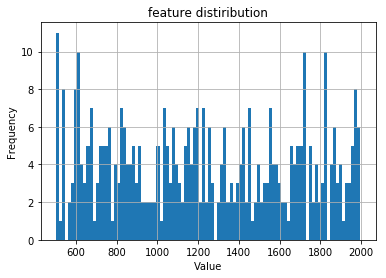

batery power mean : 1226.425 , batery power std : 448.959


In [10]:
import random
from matplotlib import pyplot as plt

seed = 10

random.seed(seed)
np.random.seed(seed)

feature = 'battery_power'
print('feature :', feature)
x = df[feature]
plt.title('feature distiribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(x, bins=100)
plt.grid()
plt.savefig("battery_power_distr.png")
plt.show()

print('batery power mean :', np.mean(x),', batery power std :', round(np.std(x), 3))

В качестве данных было взято разбиение на 5 кластеров, подсчитанное в предыдущем задании. Для воспроизводимости результатов зафиксирован seed равный 10. В качестве признака выбран заряд аккумулятора телефона. Распределение значений данного признака визуально неподдается никакому известному распределению.

In [6]:
m, k = 150, 5000

grand_bootstrap_samples = np.random.choice(x, size=(m, k))
f_cl_bootstrap_samples = np.random.choice(best_partition[1][:,0], size=(m, k))
s_cl_bootstrap_samples = np.random.choice(best_partition[-2][:,0], size=(m, k))

grand_col_means = np.mean(grand_bootstrap_samples, axis = 0)
f_col_means = np.mean(f_cl_bootstrap_samples, axis = 0)
s_col_means = np.mean(s_cl_bootstrap_samples, axis = 0)

grand_mean, grand_std = np.mean(grand_col_means), np.std(grand_col_means)
f_mean, f_std = np.mean(f_col_means), np.std(f_col_means)
s_mean, s_std = np.mean(s_col_means), np.std(s_col_means)

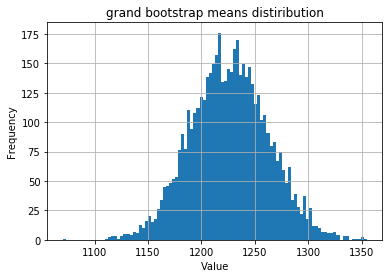


general bootstrap mean : 1226.4269906666666 , general bootstrap std : 36.26062039491206

confidence 95% intervals

	confidence interval : [1155.356174692639, 1297.4978066406943], (Pivotal method)

Non-pivotal method

	confidence interval : [1157.4180000000001, 1298.2745], (Non-pivotal method)


In [7]:
plt.title('grand bootstrap means distiribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(grand_col_means, bins=100)
plt.grid()
plt.savefig("grand_bootstrap_means distiribution.png")
plt.show()

print('\ngeneral bootstrap mean :', grand_mean,', general bootstrap std :', grand_std)

print('\nconfidence 95% intervals')
# pivotal method

lbp, rbp = grand_mean - 1.96*grand_std, grand_mean + 1.96*grand_std
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Pivotal method)')

# non-pivotal method
print('\nNon-pivotal method')
lbp, rbp = np.percentile(grand_col_means, 2.5), np.percentile(grand_col_means, 97.5)
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Non-pivotal method)')

Для посдчета 95% доверительных интервалов использовался бутстреп в двух вариантах: pivotal и non-pivotal. В обоих случаях размер генерируемых выборок равен 150 на 5000.
Реальное значение математического ожидания заряда аккумулятора лежит внутри полученных интервалов. Следовательно, доверительные интервалы являются корректными.

## 2 Compare the within-cluster means for one of the features between two clusters using bootstrap

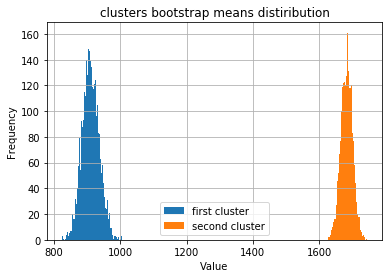


first cluster bootstrap mean : 910.4818826666666 , first cluster bootstrap std : 25.81759211928542

second cluster bootstrap mean : 1683.5298440000001 , second cluster bootstrap std : 17.651387054660653


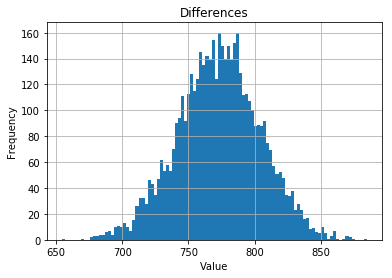


95% confidence interval A for differences D

	confidence interval : [711.5917184148855, 834.5042042517816], (Pivotal method)

Non-pivotal method

	confidence interval : [711.3166666666666, 833.9491666666667], (Non-pivotal method)


In [8]:
plt.title('clusters bootstrap means distiribution')
#plt.hist(grand_col_means, bins=100, label='all data')
plt.hist(f_col_means, bins=100, label='first cluster')
plt.hist(s_col_means, bins=100, label='second cluster')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig("clusters_means.png")
plt.legend(loc='best')
plt.show()

print('\nfirst cluster bootstrap mean :', f_mean,', first cluster bootstrap std :', f_std)
print('\nsecond cluster bootstrap mean :', s_mean,', second cluster bootstrap std :', s_std)

dif_col_means = s_col_means - f_col_means
differences = s_mean - f_mean
dif_std = np.std(dif_col_means)

plt.title('Differences')
plt.hist(s_col_means-f_col_means, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig("clusters_diff.png")
#plt.hist(grand_col_means-f_col_means, bins=100, label='all - second')
#plt.hist(grand_col_means-s_col_means, bins=100, label='all - first')
plt.grid()
plt.show()

print('\n95% confidence interval A for differences D')
# pivotal method

lbp, rbp = differences - 1.96*dif_std, differences + 1.96*dif_std
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Pivotal method)')

# non-pivotal method
print('\nNon-pivotal method')
lbp, rbp = np.percentile(dif_col_means, 2.5), np.percentile(dif_col_means, 97.5)
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Non-pivotal method)')

Сравнивались второй и четвертый кластеры. С помощью  pivotal и non-pivotal методов были построены доверительные интервалы для разности математических ожиданий соотвественных кластеров. В обоих случаях данные интервалы не содержат нуля. Это значит что мат. ожидания в кластерах различны. Опираясь на бустреп распределения мат. ожиданий кластеров, можно сделать вывод, что МО второго кластера ближе к МО всего признака.

## 3. Take a cluster, and compare the grand mean with the withincluster mean for the feature by using bootstrap

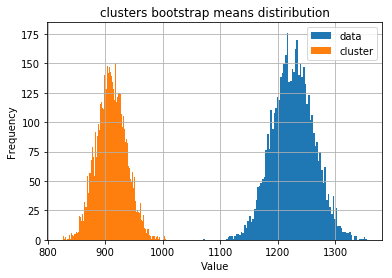


first cluster bootstrap mean : 910.4818826666666 , first cluster bootstrap std : 25.81759211928542

grand bootstrap mean : 1226.4269906666666 , grand bootstrap std : 36.26062039491206


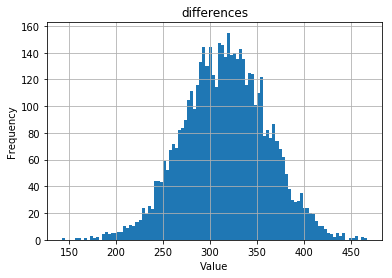


95% confidence interval A for differences D

	confidence interval : [228.38776360421662, 403.5024523957834], (Pivotal method)

Non-pivotal method

	confidence interval : [228.46550000000002, 403.2223333333332], (Non-pivotal method)


In [9]:
plt.title('clusters bootstrap means distiribution')
plt.hist(grand_col_means, bins=100, label='data')
plt.hist(f_col_means, bins=100, label='cluster')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig("data_clusster_means.png")
plt.legend(loc='best')
plt.show()

print('\nfirst cluster bootstrap mean :', f_mean,', first cluster bootstrap std :', f_std)
print('\ngrand bootstrap mean :', grand_mean,', grand bootstrap std :', grand_std)

dif_col_means = grand_col_means - f_col_means
differences = grand_mean - f_mean
dif_std = np.std(dif_col_means)

plt.title('differences')
plt.hist(grand_col_means-f_col_means, bins=100)
plt.grid()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig("data_clusster_diff.png")
plt.show()

print('\n95% confidence interval A for differences D')
# pivotal method

lbp, rbp = differences - 1.96*dif_std, differences + 1.96*dif_std
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Pivotal method)')

# non-pivotal method
print('\nNon-pivotal method')
lbp, rbp = np.percentile(dif_col_means, 2.5), np.percentile(dif_col_means, 97.5)
print('\n\tconfidence interval : [' + str(lbp) + ', ' + str(rbp) + '], (Non-pivotal method)')

Из построенных гистограмм видно, что математическое ожидание во втором кластере сильно меньше чем общее математическое ожидание уровня заряда аккумулятора. В обоих способах построения доверительных интервалов с помощью бутстрепа полученные доверительные интервалы не содержат нуля, что также говорит о сильных различиях между соответствующими мат. ожиданиями.